In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

# import utility methods
sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("ggplot")

In [5]:
df_url = create_onedrive_directdownload("https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=DpxVxw")
df = pd.read_csv(df_url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


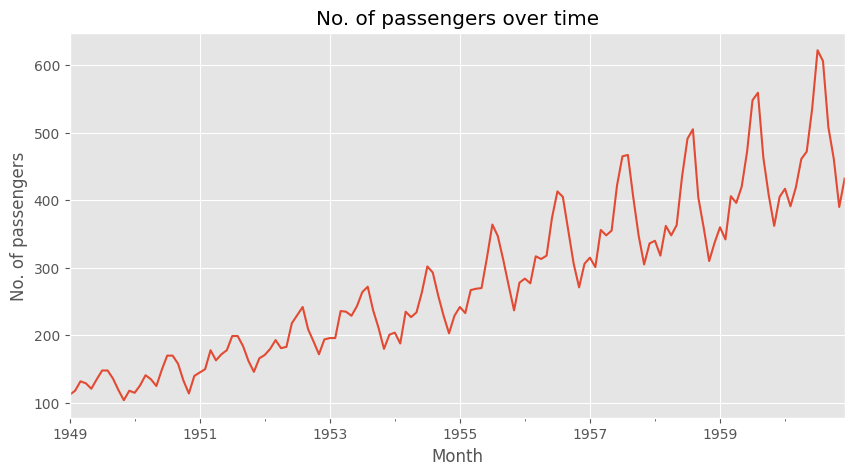

In [8]:
df["Passengers"].plot(figsize=(10, 5))
plt.ylabel("No. of passengers")
plt.title("No. of passengers over time")
plt.show()

lam: 0.14802265137037945


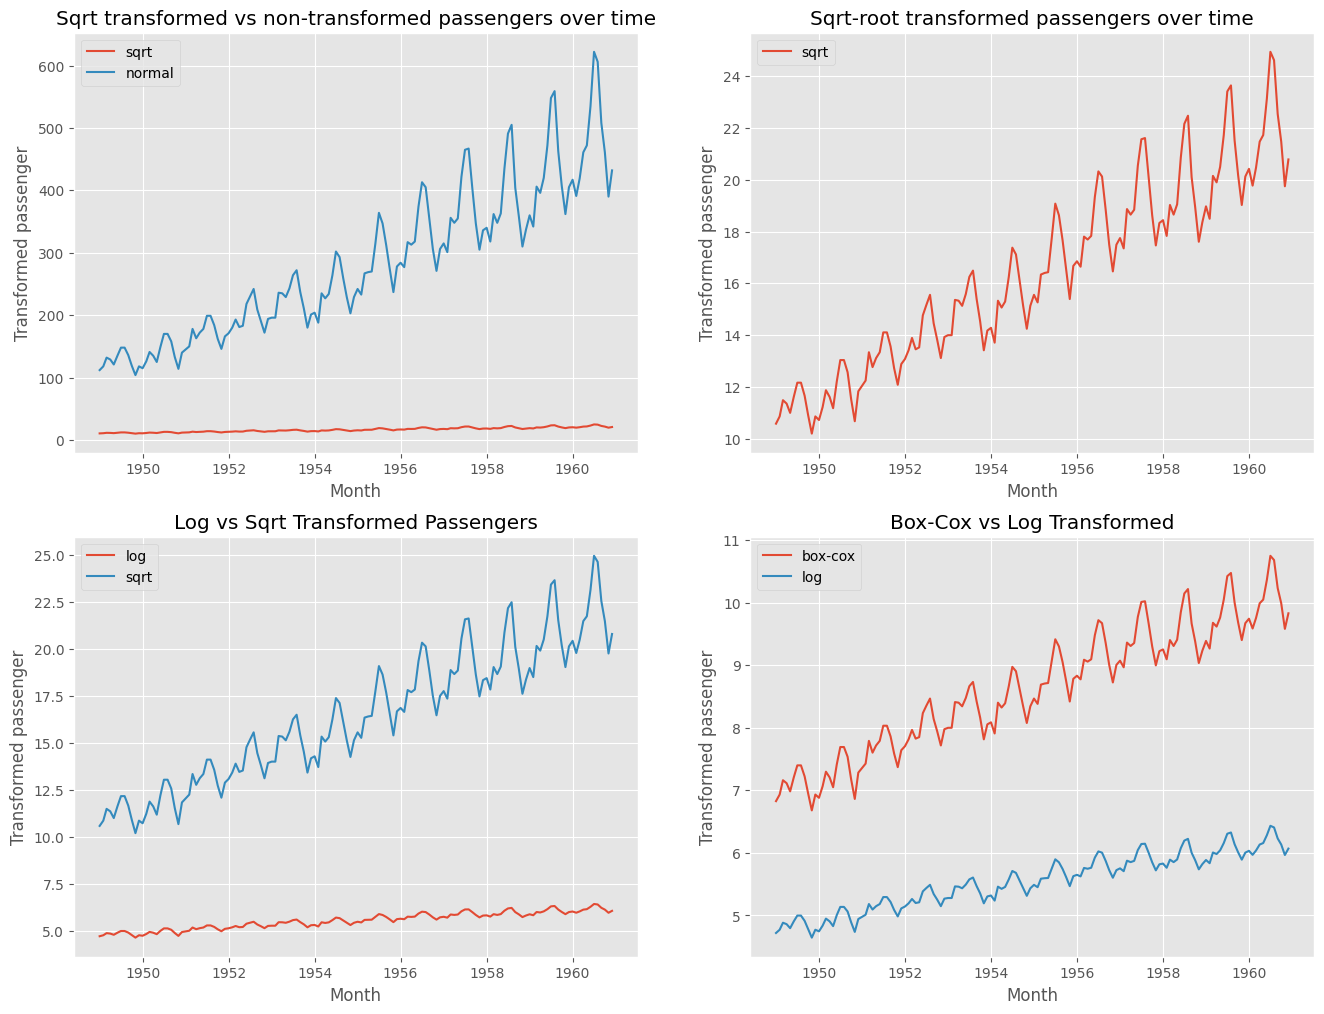

In [21]:
# SQRT-Transformation
df["SqrtPassengers"] = np.sqrt(df["Passengers"])
# Log-Transformation
df["LogPassengers"] = np.log(df["Passengers"])
# Box-Cox transformation
data, lam = stats.boxcox(df["Passengers"])
print(f"lam: {lam}")
df["BoxCoxPassengers"] = data

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# compare sqrt transformed result with the non-transformed data
axs[0][0].plot(df["SqrtPassengers"], label="sqrt")
axs[0][0].plot(df["Passengers"], label="normal")
axs[0][0].set_title("Sqrt transformed vs non-transformed passengers over time")

# plot sqrt transformed data
axs[0][1].plot(df["SqrtPassengers"], label="sqrt")
axs[0][1].set_title("Sqrt-root transformed passengers over time")

# plot log-transformed data
axs[1][0].plot(df["LogPassengers"], label="log")
axs[1][0].plot(df["SqrtPassengers"], label="sqrt")
axs[1][0].set_title("Log vs Sqrt Transformed Passengers")

axs[1][1].plot(df["BoxCoxPassengers"], label="box-cox")
axs[1][1].plot(df["LogPassengers"], label="log")
axs[1][1].set_title("Box-Cox vs Log Transformed")

# add labels and allow the legends
for i, ax in enumerate(fig.axes):
    ax.set_xlabel("Month")
    ax.set_ylabel("Transformed passenger")
    ax.legend()

plt.show()

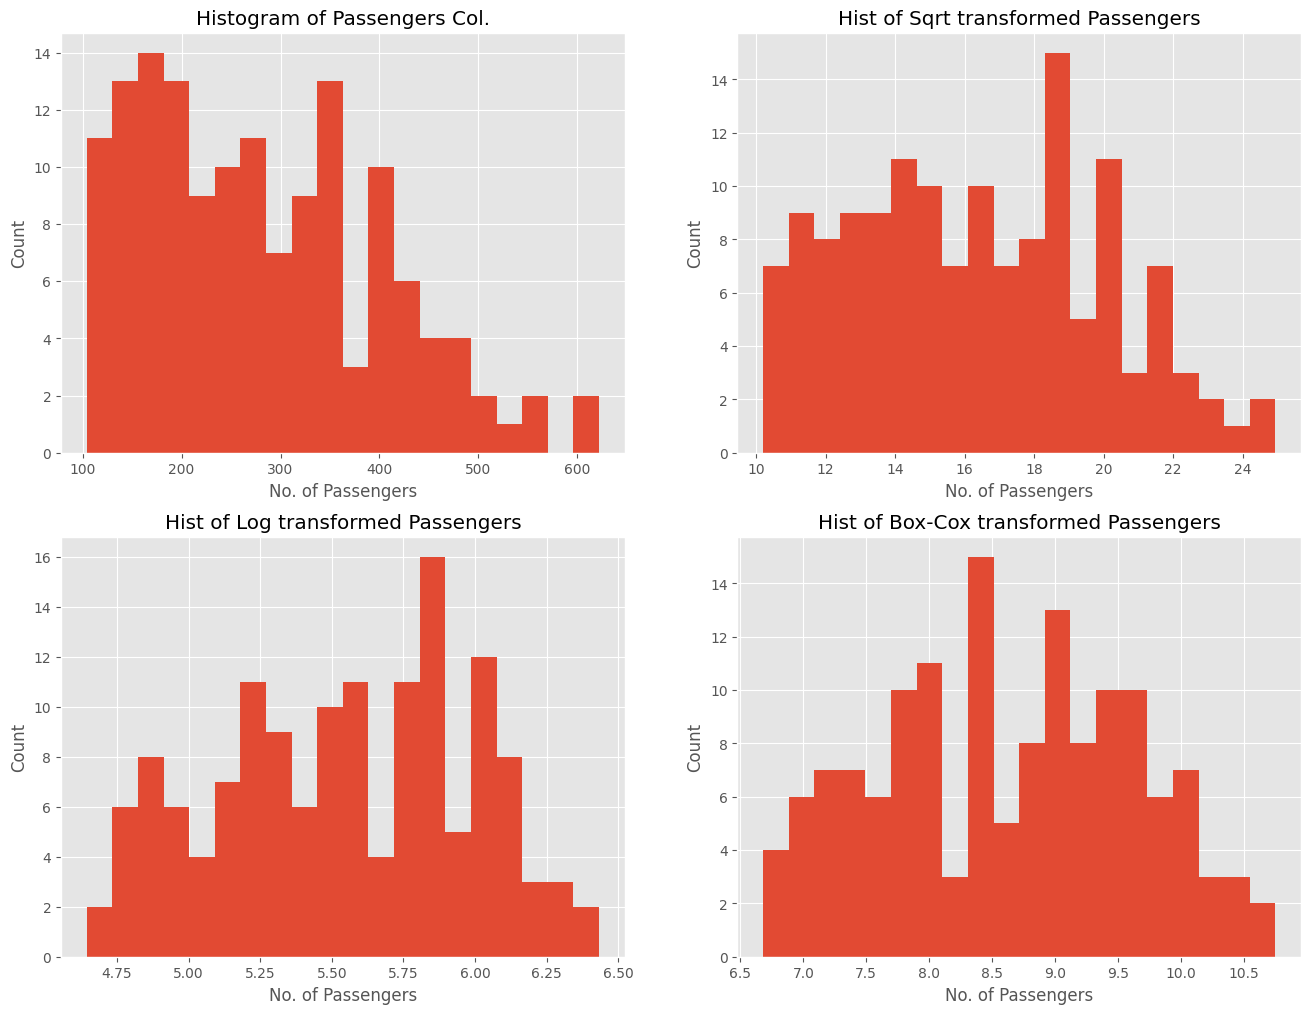

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
bins = 20

axs[0][0].hist(df["Passengers"], bins=bins)
axs[0][0].set_title("Histogram of Passengers Col.")

axs[0][1].hist(df["SqrtPassengers"], bins=bins)
axs[0][1].set_title("Hist of Sqrt transformed Passengers")

axs[1][0].hist(df["LogPassengers"], bins=bins)
axs[1][0].set_title("Hist of Log transformed Passengers")

axs[1][1].hist(df["BoxCoxPassengers"], bins=bins)
axs[1][1].set_title("Hist of Box-Cox transformed Passengers")

# add labels and allow the legends
for i, ax in enumerate(fig.axes):
    ax.set_xlabel("No. of Passengers")
    ax.set_ylabel("Count")
plt.show()